<a href="https://colab.research.google.com/github/moriahsantiago/UPenn-Data-Science-Digital-Learning/blob/main/Week_11_2_MOOC_Forum_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using NetworkX for Network Analysis

We will use a Python package named `NetworkX` to run some basic network analysis in this module. There are many other powerful network analysis packages out there, such as `igraph`. `NetworkX` is very intuitive to work with and you can switch to other packages if you like.

The module will provide you sample code to work with.

In [10]:
import math

def max_undirected_connections(n):
  """Calculates the maximum possible connections in an undirected network.

  Args:
    n: The number of nodes in the network.

  Returns:
    The maximum number of connections.
  """
  return math.comb(n, 2) # n! / (2! * (n-2)!)

# Example usage
num_nodes = 103
max_connections = max_undirected_connections(num_nodes)
print(f"Maximum connections for {num_nodes} nodes (undirected): {max_connections}")

Maximum connections for 103 nodes (undirected): 5253


## Import NetworkX

In Python, the first thing to do is to import the package to the runtime environment. We are giving the package a nickname `nx` so it's easier to refer to it.

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

Now the package has been successfully imported.

Note that we use these two words *network* and *graph* interchangeably but they could mean quite different things in different contexts.

## Create a toy network manually

Let's create an empty network using `nx.Graph` and then manually add 3 nodes and 2 edges to the network.

Below is a few lines of code to achieve this goal.

In [3]:
g = nx.Graph()

g.add_node(1)             # Add a single node
g.add_nodes_from([2,3,4])   # Add a list of nodes

g.add_edge(1,2)
g.add_edge(3,1)
g.add_edge(1,4)

## Visualize a network

You can simply call the `draw()` function to draw the network.

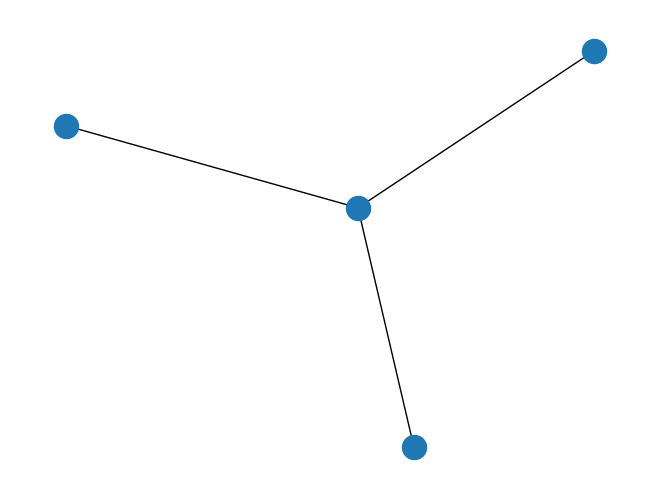

In [4]:
nx.draw(g)

The `draw()` function draws the graph as a simple representation with no node labels or edge labels.

To have more options such as adding node labeling and graph titles, you can use `draw_networkx()`.

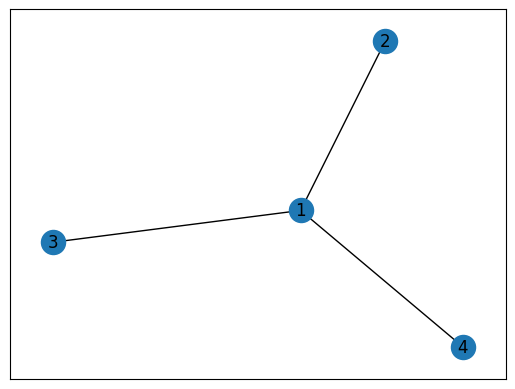

In [5]:
nx.draw_networkx(g)

## Create a Directed Network



In [6]:
dg = nx.DiGraph()

dg.add_edge('A','B', weight= 2, relation = 'family')
dg.add_edge('C', 'B', weight= 5, relation = 'friend')

dg.is_directed()

True

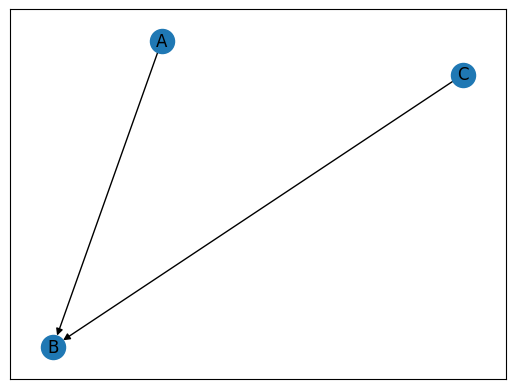

In [7]:
nx.draw_networkx(dg)

## Create a classic network

Instead of manually creating a network, you can also create classic graphs using NetworkX.

Below, we load the classic Karate Club graph by Zachary (1977) and visualize it.

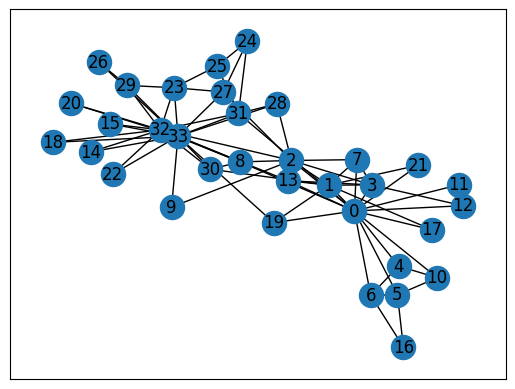

In [8]:
g_kc = nx.karate_club_graph()

nx.draw_networkx(g_kc)

In [9]:
print("Number of edges in Karate Club graph:", g_kc.number_of_edges())

Number of edges in Karate Club graph: 78


In [13]:
# Load the data with proper tab separation
df = pd.read_csv(url, sep='\t')

# Check the structure again
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst few rows:")
print(df.head(10))
print("\nLast few rows:")
print(df.tail())

Dataset shape: (198, 4)

Column names: ['ID', 'poster', 'thread', 'response-to']

First few rows:
   ID  poster  thread  response-to
0   1   69497       1          NaN
1   2   44591       2          NaN
2   3   24601       2          2.0
3   4   74570       3          NaN
4   5   29022       3          4.0
5   6   12345       3          5.0
6   7   24601       3          5.0
7   8   29022       3          7.0
8   9   24601       3          8.0
9  10   74577       4          NaN

Last few rows:
      ID  poster  thread  response-to
193  194   73263      47        193.0
194  195   68491      47        193.0
195  196   26362      47        195.0
196  197    4582      47        195.0
197  198   22986      48          NaN


In [14]:
# Step 1: Create a mapping from post ID to poster
df_copy = df.copy()
df_copy.set_index('ID', inplace=True)
df_dict = df_copy.to_dict()['poster']

# Step 2: Map response-to IDs to find who was responded to
df['poster_responded_to'] = df['response-to'].map(df_dict)

# Step 3: Drop rows without pairs (original posts)
df_connections = df.dropna(subset=['response-to', 'poster_responded_to'])

# Step 4: Create poster -> receiver pairs and count unique connections
connections = df_connections[['poster', 'poster_responded_to']].drop_duplicates()

print("Number of unique direct connections:", len(connections))
print("\nFirst few connections:")
print(connections.head())

Number of unique direct connections: 135

First few connections:
   poster  poster_responded_to
2   24601              44591.0
4   29022              74570.0
5   12345              29022.0
6   24601              29022.0
7   29022              24601.0


In [15]:
# Step 1: Create a mapping from post ID to poster
df_copy = df.copy()
df_copy.set_index('ID', inplace=True)
df_dict = df_copy.to_dict()['poster']

# Step 2: Map response-to IDs to find who was responded to
df['poster_responded_to'] = df['response-to'].map(df_dict)

# Step 3: Drop rows without pairs (original posts)
df_connections = df.dropna(subset=['response-to', 'poster_responded_to'])

# Step 4: Build links by concatenating poster pairs
df_connections['link'] = df_connections['poster'].astype(str) + '_' + df_connections['poster_responded_to'].astype(str)

# Step 5: Count unique links
unique_links = df_connections['link'].nunique()

print("Number of unique concatenated links:", unique_links)
print("\nFirst few links:")
print(df_connections[['poster', 'poster_responded_to', 'link']].head())
print("\nSample of unique links:")
print(df_connections['link'].unique()[:10])

Number of unique concatenated links: 135

First few links:
   poster  poster_responded_to           link
2   24601              44591.0  24601_44591.0
4   29022              74570.0  29022_74570.0
5   12345              29022.0  12345_29022.0
6   24601              29022.0  24601_29022.0
7   29022              24601.0  29022_24601.0

Sample of unique links:
['24601_44591.0' '29022_74570.0' '12345_29022.0' '24601_29022.0'
 '29022_24601.0' '24601_74577.0' '12345_24601.0' '432_12345.0'
 '22986_432.0' '24601_22986.0']


<ipython-input-15-854b37d4db29>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_connections['link'] = df_connections['poster'].astype(str) + '_' + df_connections['poster_responded_to'].astype(str)


In [17]:
# Step 1-3: Same as before
df_copy = df.copy()
df_copy.set_index('ID', inplace=True)
df_dict = df_copy.to_dict()['poster']
df['poster_responded_to'] = df['response-to'].map(df_dict)
df_connections = df.dropna(subset=['response-to', 'poster_responded_to']).copy()

# Step 4: Create undirected pairs
def make_undirected(row):
    if row['poster'] < row['poster_responded_to']:
        val = str(int(row['poster'])) + "-" + str(int(row['poster_responded_to']))
    else:
        val = str(int(row['poster_responded_to'])) + "-" + str(int(row['poster']))
    return val

df_connections['undirected_pair'] = df_connections.apply(make_undirected, axis=1)

# Step 5: Remove self-connections (where poster == poster_responded_to)
df_no_self = df_connections[df_connections['poster'] != df_connections['poster_responded_to']].copy()

# Step 6: Count unique undirected pairs (removing empty rows and duplicates)
unique_pairs = df_no_self['undirected_pair'].dropna().unique()

print("Number of unique undirected connections (no self-connections):", len(unique_pairs))
print("\nFirst few pairs:")
print(unique_pairs[:10])

# Let's also check if there were any self-connections
self_connections = df_connections[df_connections['poster'] == df_connections['poster_responded_to']]
print(f"\nSelf-connections removed: {len(self_connections)}")

Number of unique undirected connections (no self-connections): 110

First few pairs:
['24601-44591' '29022-74570' '12345-29022' '24601-29022' '24601-74577'
 '12345-24601' '432-12345' '432-22986' '22986-24601' '12345-31345']

Self-connections removed: 3


## Learn More about NetworkX

This notebook provides a gentle introduction to NetworkX, to demonstrate how easy it is to get started.

In this course, we will work with many other areas of network analysis.

If you are newer to Python programming, one important skill in the process is to learn how to check reference pages and find answers yourself.

For example, NetworkX provides a very well organized reference page that can be helpful: https://networkx.org/documentation/stable/reference/index.html

You are also encouraged to leverage ChatGPT in the process, as long as you spend time to make sense of ChatGPT outputs and be transparent and responsible for what is submitted as *your* work.